In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
import seaborn

In [ ]:
df = pd.read_csv("result.csv")

In [ ]:
df = df.drop(["eventNumber", "prototrackIndex", "duplicate"], axis=1)

In [ ]:
df = df.drop(["nMeasurements", "nStates", "nHoles", "nSharedHits"], axis=1)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax, square=True)

In [ ]:
result = []
x = df.drop(["fake"], axis=1)
y = df["fake"]

random_state = 64
# Разделяем данные на обучающий и тестовый наборы
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)

count_class_0, count_class_1 = y_train.value_counts()

scale_pos_weight = count_class_0 / count_class_1

In [38]:
model = xgb.XGBClassifier(random_state=random_state,
                          scale_pos_weight=scale_pos_weight,
                          max_depth=7,
                          n_estimators=25)
model.fit(x_train, y_train)
print(1)

1


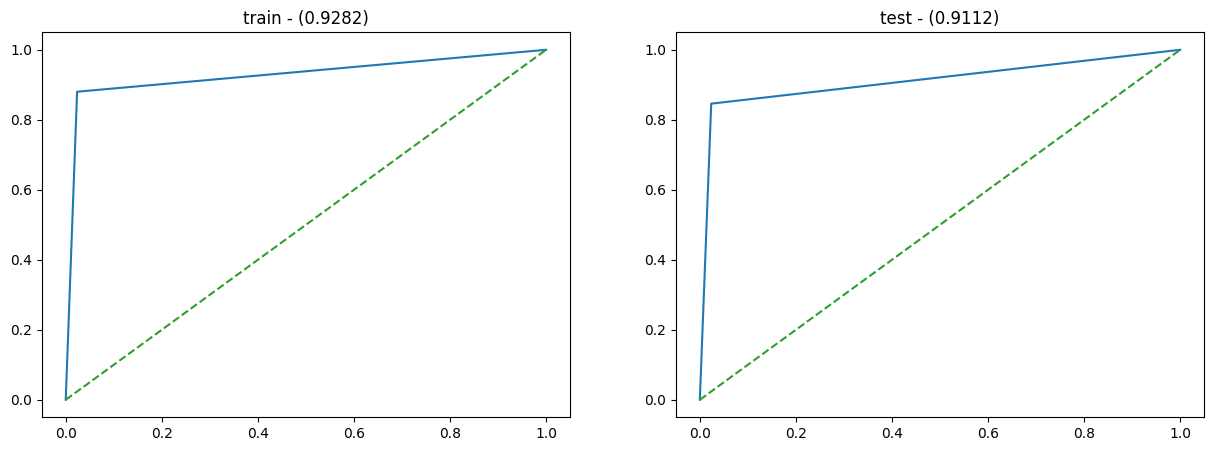

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
title = ["train", "test"]
for i, data in enumerate([[x_train, y_train], [x_test, y_test]]):
    prediction, target_list = model.predict_proba(data[0])[:, [1]], data[1]
    for q in range(len(prediction)):
        prediction[q][0] = 1 if prediction[q][0] >= 0.7 else 0
    logit_roc_aut = roc_auc_score(target_list, prediction)
    fpr, tpr, thresholds = roc_curve(target_list, prediction)

    axs[i].plot(fpr, tpr, logit_roc_aut)
    axs[i].plot([0, 1], [0, 1], '--')
    axs[i].set_title(f"{title[i]} - ({round(logit_roc_aut, 4)})")
plt.show()